In [1]:
WORKER_ID = 5

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]=str(WORKER_ID)

In [3]:
# whether to log each feature and sequence status
verbose = True

In [4]:
import gc
import os
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
import itertools
import sys
sys.path.append('..')

In [5]:
# setup paths
pwd = os.getcwd().replace("notebooks","")
path_cache = pwd + 'cache/'
path_data = pwd + 'data/'

In [6]:
# setup logging
# any explicit log messages or uncaught errors to stdout and file /logs.log
import logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(threadName)-12.12s] [%(levelname)-5.5s]  %(message)s",
    handlers=[
        logging.FileHandler("{0}/{1}.log".format(pwd, "logs")),
        logging.StreamHandler()
    ])
# init logger
logger = logging.getLogger()
# make logger aware of any uncaught exceptions
def handle_exception(exc_type, exc_value, exc_traceback):
    if issubclass(exc_type, KeyboardInterrupt):
        sys.__excepthook__(exc_type, exc_value, exc_traceback)
        return

    logger.error("Uncaught exception", exc_info=(exc_type, exc_value, exc_traceback))
sys.excepthook = handle_exception

In [7]:
from deepvideoclassification.architectures import Architecture

Using TensorFlow backend.


# Run experiments

In [8]:
experiment_batch_name = 'experiment_batch_1'

In [9]:
# load list of experiments
experiments = pd.read_csv(pwd + "experiments/" + experiment_batch_name + '.csv')

In [10]:
print(experiments.shape)

(5376, 12)


2019-01-20 15:05:15,376 [MainThread  ] [INFO ]  Begin experiment for model_id=197 on GPU:5 
2019-01-20 15:05:15,377 [MainThread  ] [INFO ]  Model folder exists but no results found - potential error in previous model training
2019-01-20 15:05:15,378 [MainThread  ] [INFO ]  Loading data


197   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'pretrained_model_name': 'inception_resnet_v2', 'dropout': 0.2, 'sequence_model': nan, 'layer_1_size': 512, 'sequence_length': 3, 'pooling': 'max', 'WORKER': 5, 'architecture': 'video_MLP_concat', 'layer_3_size': 256, 'layer_2_size': 256, 'sequence_model_layers': nan, 'model_id': 197}


2019-01-20 15:05:16,433 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/inception_resnet_v2/max/
2019-01-20 15:05:16,434 [MainThread  ] [INFO ]  Loading features sequence data into memory [may take a few minutes]


Done initializing data with #samples: train=60553, valid=6412, test=3137
Train on 60553 samples, validate on 6412 samples
Epoch 1/20
60553/60553 [==============================] - 33s 546us/step - loss: 0.2432 - acc: 0.9189 - val_loss: 0.1825 - val_acc: 0.9127

Epoch 00001: val_acc improved from -inf to 0.91271, saving model to /mnt/seals/models/197/model_round_1.h5
Epoch 2/20
60553/60553 [==============================] - 18s 305us/step - loss: 0.1712 - acc: 0.9309 - val_loss: 0.1943 - val_acc: 0.9127

Epoch 00002: val_acc did not improve from 0.91271
Epoch 3/20
60553/60553 [==============================] - 18s 303us/step - loss: 0.1624 - acc: 0.9333 - val_loss: 0.2098 - val_acc: 0.9012

Epoch 00003: val_acc did not improve from 0.91271
Epoch 4/20
60553/60553 [==============================] - 18s 303us/step - loss: 0.1566 - acc: 0.9356 - val_loss: 0.2183 - val_acc: 0.9048

Epoch 00004: val_acc did not improve from 0.91271
H1 {'loss': [0.24320616213922533, 0.17120334999237619, 0.1623

2019-01-20 15:11:03,959 [MainThread  ] [INFO ]  {
    "architecture": "video_mlp_concat",
    "batch_size": 32,
    "convolution_kernel_size": 3,
    "data_total_rows_test": 3137,
    "data_total_rows_train": 60553,
    "data_total_rows_valid": 6412,
    "dropout": 0.2,
    "fit_best_round": 2,
    "fit_dt_test_duration_seconds": "0",
    "fit_dt_test_end": "2019-01-20 15:11:02",
    "fit_dt_test_start": "2019-01-20 15:11:02",
    "fit_dt_train_duration_seconds": "342",
    "fit_dt_train_end": "2019-01-20 15:11:01",
    "fit_dt_train_start": "2019-01-20 15:05:19",
    "fit_num_epochs": 11,
    "fit_stopped_epoch1": 1,
    "fit_stopped_epoch2": 3,
    "fit_stopped_epoch3": 4,
    "fit_test_acc": 0.5871852087982148,
    "fit_train_acc": 0.9438791695701128,
    "fit_train_loss": 0.13414381149817092,
    "fit_val_acc": 0.9236253649089311,
    "fit_val_loss": 0.17784037077084824,
    "frame_size": [
        299,
        299
    ],
    "layer_1_size": 512,
    "layer_2_size": 256,
    "layer

205   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'pretrained_model_name': 'inception_resnet_v2', 'dropout': 0.2, 'sequence_model': nan, 'layer_1_size': 512, 'sequence_length': 3, 'pooling': 'max', 'WORKER': 5, 'architecture': 'video_MLP_concat', 'layer_3_size': 256, 'layer_2_size': 0, 'sequence_model_layers': nan, 'model_id': 205}


2019-01-20 15:11:08,337 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/inception_resnet_v2/max/
2019-01-20 15:11:08,338 [MainThread  ] [INFO ]  Loading features sequence data into memory [may take a few minutes]


Done initializing data with #samples: train=60553, valid=6412, test=3137
Train on 60553 samples, validate on 6412 samples
Epoch 1/20
60553/60553 [==============================] - 17s 281us/step - loss: 2.0957 - acc: 0.8666 - val_loss: 2.2640 - val_acc: 0.8577

Epoch 00001: val_acc improved from -inf to 0.85768, saving model to /mnt/seals/models/205/model_round_1.h5
Epoch 2/20
60553/60553 [==============================] - 16s 268us/step - loss: 1.9003 - acc: 0.8800 - val_loss: 2.2006 - val_acc: 0.8616

Epoch 00002: val_acc improved from 0.85768 to 0.86160, saving model to /mnt/seals/models/205/model_round_1.h5
Epoch 3/20
60553/60553 [==============================] - 16s 264us/step - loss: 1.8415 - acc: 0.8838 - val_loss: 2.2215 - val_acc: 0.8607

Epoch 00003: val_acc did not improve from 0.86160
Epoch 4/20
60553/60553 [==============================] - 16s 262us/step - loss: 1.8398 - acc: 0.8842 - val_loss: 2.2311 - val_acc: 0.8599

Epoch 00004: val_acc did not improve from 0.86160
E

2019-01-20 15:17:34,671 [MainThread  ] [INFO ]  {
    "architecture": "video_mlp_concat",
    "batch_size": 32,
    "convolution_kernel_size": 3,
    "data_total_rows_test": 3137,
    "data_total_rows_train": 60553,
    "data_total_rows_valid": 6412,
    "dropout": 0.2,
    "fit_best_round": 3,
    "fit_dt_test_duration_seconds": "0",
    "fit_dt_test_end": "2019-01-20 15:17:33",
    "fit_dt_test_start": "2019-01-20 15:17:32",
    "fit_dt_train_duration_seconds": "380",
    "fit_dt_train_end": "2019-01-20 15:17:31",
    "fit_dt_train_start": "2019-01-20 15:11:11",
    "fit_num_epochs": 17,
    "fit_stopped_epoch1": 2,
    "fit_stopped_epoch2": 1,
    "fit_stopped_epoch3": 11,
    "fit_test_acc": 0.45553076187440233,
    "fit_train_acc": 0.8912310785218266,
    "fit_train_loss": 1.7338469354505475,
    "fit_val_acc": 0.861286883940194,
    "fit_val_loss": 2.215449474858851,
    "frame_size": [
        299,
        299
    ],
    "layer_1_size": 512,
    "layer_2_size": 0,
    "layer_3_s

213   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'pretrained_model_name': 'inception_resnet_v2', 'dropout': 0.2, 'sequence_model': nan, 'layer_1_size': 256, 'sequence_length': 3, 'pooling': 'max', 'WORKER': 5, 'architecture': 'video_MLP_concat', 'layer_3_size': 256, 'layer_2_size': 256, 'sequence_model_layers': nan, 'model_id': 213}


2019-01-20 15:17:38,897 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/inception_resnet_v2/max/
2019-01-20 15:17:38,898 [MainThread  ] [INFO ]  Loading features sequence data into memory [may take a few minutes]


Done initializing data with #samples: train=60553, valid=6412, test=3137
Train on 60553 samples, validate on 6412 samples
Epoch 1/20
60553/60553 [==============================] - 18s 297us/step - loss: 0.2229 - acc: 0.9164 - val_loss: 0.1983 - val_acc: 0.9116

Epoch 00001: val_acc improved from -inf to 0.91157, saving model to /mnt/seals/models/213/model_round_1.h5
Epoch 2/20
60553/60553 [==============================] - 17s 277us/step - loss: 0.1731 - acc: 0.9298 - val_loss: 0.1943 - val_acc: 0.9015

Epoch 00002: val_acc did not improve from 0.91157
Epoch 3/20
60553/60553 [==============================] - 17s 287us/step - loss: 0.1662 - acc: 0.9321 - val_loss: 0.1864 - val_acc: 0.9105

Epoch 00003: val_acc did not improve from 0.91157
Epoch 4/20
60553/60553 [==============================] - 16s 270us/step - loss: 0.1642 - acc: 0.9334 - val_loss: 0.2049 - val_acc: 0.9135

Epoch 00004: val_acc improved from 0.91157 to 0.91351, saving model to /mnt/seals/models/213/model_round_1.h5
E

2019-01-20 15:23:18,954 [MainThread  ] [INFO ]  {
    "architecture": "video_mlp_concat",
    "batch_size": 32,
    "convolution_kernel_size": 3,
    "data_total_rows_test": 3137,
    "data_total_rows_train": 60553,
    "data_total_rows_valid": 6412,
    "dropout": 0.2,
    "fit_best_round": 2,
    "fit_dt_test_duration_seconds": "0",
    "fit_dt_test_end": "2019-01-20 15:23:17",
    "fit_dt_test_start": "2019-01-20 15:23:16",
    "fit_dt_train_duration_seconds": "333",
    "fit_dt_train_end": "2019-01-20 15:23:15",
    "fit_dt_train_start": "2019-01-20 15:17:42",
    "fit_num_epochs": 13,
    "fit_stopped_epoch1": 5,
    "fit_stopped_epoch2": 2,
    "fit_stopped_epoch3": 3,
    "fit_test_acc": 0.5495696525342684,
    "fit_train_acc": 0.9406659293081822,
    "fit_train_loss": 0.14580339691345534,
    "fit_val_acc": 0.9319356777336325,
    "fit_val_loss": 0.17260039899398294,
    "frame_size": [
        299,
        299
    ],
    "layer_1_size": 256,
    "layer_2_size": 256,
    "layer

221   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'pretrained_model_name': 'inception_resnet_v2', 'dropout': 0.2, 'sequence_model': nan, 'layer_1_size': 256, 'sequence_length': 3, 'pooling': 'max', 'WORKER': 5, 'architecture': 'video_MLP_concat', 'layer_3_size': 256, 'layer_2_size': 0, 'sequence_model_layers': nan, 'model_id': 221}


2019-01-20 15:23:22,734 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/inception_resnet_v2/max/
2019-01-20 15:23:22,735 [MainThread  ] [INFO ]  Loading features sequence data into memory [may take a few minutes]


Done initializing data with #samples: train=60553, valid=6412, test=3137
Train on 60553 samples, validate on 6412 samples
Epoch 1/20
60553/60553 [==============================] - 15s 251us/step - loss: 2.2889 - acc: 0.8542 - val_loss: 2.3298 - val_acc: 0.8523

Epoch 00001: val_acc improved from -inf to 0.85229, saving model to /mnt/seals/models/221/model_round_1.h5
Epoch 2/20
60553/60553 [==============================] - 14s 230us/step - loss: 0.2982 - acc: 0.9217 - val_loss: 0.1937 - val_acc: 0.9047

Epoch 00002: val_acc improved from 0.85229 to 0.90469, saving model to /mnt/seals/models/221/model_round_1.h5
Epoch 3/20
60553/60553 [==============================] - 13s 220us/step - loss: 0.1609 - acc: 0.9346 - val_loss: 0.1974 - val_acc: 0.9061

Epoch 00003: val_acc improved from 0.90469 to 0.90614, saving model to /mnt/seals/models/221/model_round_1.h5
Epoch 4/20
60553/60553 [==============================] - 13s 219us/step - loss: 0.1519 - acc: 0.9361 - val_loss: 0.1874 - val_acc:

2019-01-20 15:27:57,860 [MainThread  ] [INFO ]  {
    "architecture": "video_mlp_concat",
    "batch_size": 32,
    "convolution_kernel_size": 3,
    "data_total_rows_test": 3137,
    "data_total_rows_train": 60553,
    "data_total_rows_valid": 6412,
    "dropout": 0.2,
    "fit_best_round": 3,
    "fit_dt_test_duration_seconds": "0",
    "fit_dt_test_end": "2019-01-20 15:27:56",
    "fit_dt_test_start": "2019-01-20 15:27:55",
    "fit_dt_train_duration_seconds": "268",
    "fit_dt_train_end": "2019-01-20 15:27:54",
    "fit_dt_train_start": "2019-01-20 15:23:25",
    "fit_num_epochs": 13,
    "fit_stopped_epoch1": 4,
    "fit_stopped_epoch2": 5,
    "fit_stopped_epoch3": 1,
    "fit_test_acc": 0.5852725533949634,
    "fit_train_acc": 0.9534811446497923,
    "fit_train_loss": 0.11637138327914316,
    "fit_val_acc": 0.916696389652533,
    "fit_val_loss": 0.22465775934927032,
    "frame_size": [
        299,
        299
    ],
    "layer_1_size": 256,
    "layer_2_size": 0,
    "layer_3_

229   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'pretrained_model_name': 'inception_resnet_v2', 'dropout': 0.2, 'sequence_model': nan, 'layer_1_size': 128, 'sequence_length': 3, 'pooling': 'max', 'WORKER': 5, 'architecture': 'video_MLP_concat', 'layer_3_size': 256, 'layer_2_size': 256, 'sequence_model_layers': nan, 'model_id': 229}


2019-01-20 15:28:01,545 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/inception_resnet_v2/max/
2019-01-20 15:28:01,547 [MainThread  ] [INFO ]  Loading features sequence data into memory [may take a few minutes]


Done initializing data with #samples: train=60553, valid=6412, test=3137
Train on 60553 samples, validate on 6412 samples
Epoch 1/20
60553/60553 [==============================] - 18s 302us/step - loss: 0.2112 - acc: 0.9152 - val_loss: 0.2161 - val_acc: 0.8981

Epoch 00001: val_acc improved from -inf to 0.89812, saving model to /mnt/seals/models/229/model_round_1.h5
Epoch 2/20
60553/60553 [==============================] - 16s 272us/step - loss: 0.1799 - acc: 0.9271 - val_loss: 0.2122 - val_acc: 0.9063

Epoch 00002: val_acc improved from 0.89812 to 0.90627, saving model to /mnt/seals/models/229/model_round_1.h5
Epoch 3/20
60553/60553 [==============================] - 16s 272us/step - loss: 0.1723 - acc: 0.9308 - val_loss: 0.1815 - val_acc: 0.9169

Epoch 00003: val_acc improved from 0.90627 to 0.91690, saving model to /mnt/seals/models/229/model_round_1.h5
Epoch 4/20
60553/60553 [==============================] - 16s 263us/step - loss: 0.1621 - acc: 0.9347 - val_loss: 0.2384 - val_acc:

2019-01-20 15:35:02,689 [MainThread  ] [INFO ]  {
    "architecture": "video_mlp_concat",
    "batch_size": 32,
    "convolution_kernel_size": 3,
    "data_total_rows_test": 3137,
    "data_total_rows_train": 60553,
    "data_total_rows_valid": 6412,
    "dropout": 0.2,
    "fit_best_round": 3,
    "fit_dt_test_duration_seconds": "0",
    "fit_dt_test_end": "2019-01-20 15:35:00",
    "fit_dt_test_start": "2019-01-20 15:34:59",
    "fit_dt_train_duration_seconds": "413",
    "fit_dt_train_end": "2019-01-20 15:34:58",
    "fit_dt_train_start": "2019-01-20 15:28:04",
    "fit_num_epochs": 18,
    "fit_stopped_epoch1": 3,
    "fit_stopped_epoch2": 8,
    "fit_stopped_epoch3": 4,
    "fit_test_acc": 0.5671023270640739,
    "fit_train_acc": 0.9509426382667486,
    "fit_train_loss": 0.1258159916665657,
    "fit_val_acc": 0.9187683952427327,
    "fit_val_loss": 0.1753938285841915,
    "frame_size": [
        299,
        299
    ],
    "layer_1_size": 128,
    "layer_2_size": 256,
    "layer_3

237   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'pretrained_model_name': 'inception_resnet_v2', 'dropout': 0.2, 'sequence_model': nan, 'layer_1_size': 128, 'sequence_length': 3, 'pooling': 'max', 'WORKER': 5, 'architecture': 'video_MLP_concat', 'layer_3_size': 256, 'layer_2_size': 0, 'sequence_model_layers': nan, 'model_id': 237}


2019-01-20 15:35:06,147 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/inception_resnet_v2/max/
2019-01-20 15:35:06,149 [MainThread  ] [INFO ]  Loading features sequence data into memory [may take a few minutes]


Done initializing data with #samples: train=60553, valid=6412, test=3137
Train on 60553 samples, validate on 6412 samples
Epoch 1/20
60553/60553 [==============================] - 15s 248us/step - loss: 0.4144 - acc: 0.9003 - val_loss: 0.2461 - val_acc: 0.9121

Epoch 00001: val_acc improved from -inf to 0.91208, saving model to /mnt/seals/models/237/model_round_1.h5
Epoch 2/20
60553/60553 [==============================] - 13s 213us/step - loss: 0.2382 - acc: 0.9077 - val_loss: 0.2336 - val_acc: 0.9127

Epoch 00002: val_acc improved from 0.91208 to 0.91269, saving model to /mnt/seals/models/237/model_round_1.h5
Epoch 3/20
60553/60553 [==============================] - 13s 213us/step - loss: 0.2307 - acc: 0.9082 - val_loss: 0.2709 - val_acc: 0.9107

Epoch 00003: val_acc did not improve from 0.91269
Epoch 4/20
60553/60553 [==============================] - 13s 215us/step - loss: 0.2265 - acc: 0.9091 - val_loss: 0.2319 - val_acc: 0.9012

Epoch 00004: val_acc did not improve from 0.91269
E

2019-01-20 15:39:55,328 [MainThread  ] [INFO ]  {
    "architecture": "video_mlp_concat",
    "batch_size": 32,
    "convolution_kernel_size": 3,
    "data_total_rows_test": 3137,
    "data_total_rows_train": 60553,
    "data_total_rows_valid": 6412,
    "dropout": 0.2,
    "fit_best_round": 1,
    "fit_dt_test_duration_seconds": "0",
    "fit_dt_test_end": "2019-01-20 15:39:53",
    "fit_dt_test_start": "2019-01-20 15:39:52",
    "fit_dt_train_duration_seconds": "281",
    "fit_dt_train_end": "2019-01-20 15:39:50",
    "fit_dt_train_start": "2019-01-20 15:35:09",
    "fit_num_epochs": 14,
    "fit_stopped_epoch1": 2,
    "fit_stopped_epoch2": 4,
    "fit_stopped_epoch3": 5,
    "fit_test_acc": 0.3726490277335034,
    "fit_train_acc": 0.9082173891652832,
    "fit_train_loss": 0.2307074539880285,
    "fit_val_acc": 0.9106808990816436,
    "fit_val_loss": 0.27088298317200676,
    "frame_size": [
        299,
        299
    ],
    "layer_1_size": 128,
    "layer_2_size": 0,
    "layer_3_

245   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'pretrained_model_name': 'inception_resnet_v2', 'dropout': 0.2, 'sequence_model': nan, 'layer_1_size': 0, 'sequence_length': 3, 'pooling': 'max', 'WORKER': 5, 'architecture': 'video_MLP_concat', 'layer_3_size': 256, 'layer_2_size': 256, 'sequence_model_layers': nan, 'model_id': 245}


2019-01-20 15:39:58,686 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/inception_resnet_v2/max/
2019-01-20 15:39:58,688 [MainThread  ] [INFO ]  Loading features sequence data into memory [may take a few minutes]


Done initializing data with #samples: train=60553, valid=6412, test=3137
Train on 60553 samples, validate on 6412 samples
Epoch 1/20
60553/60553 [==============================] - 13s 208us/step - loss: 0.7032 - acc: 0.9092 - val_loss: 1.4191 - val_acc: 0.8696

Epoch 00001: val_acc improved from -inf to 0.86955, saving model to /mnt/seals/models/245/model_round_1.h5
Epoch 2/20
60553/60553 [==============================] - 10s 170us/step - loss: 0.6757 - acc: 0.9173 - val_loss: 1.1657 - val_acc: 0.8644

Epoch 00002: val_acc did not improve from 0.86955
Epoch 3/20
60553/60553 [==============================] - 11s 174us/step - loss: 0.6286 - acc: 0.9226 - val_loss: 1.2439 - val_acc: 0.8538

Epoch 00003: val_acc did not improve from 0.86955
Epoch 4/20
60553/60553 [==============================] - 10s 170us/step - loss: 0.6277 - acc: 0.9242 - val_loss: 1.3500 - val_acc: 0.8550

Epoch 00004: val_acc did not improve from 0.86955
H1 {'loss': [0.7032257907367325, 0.6756776715597503, 0.628639

2019-01-20 15:43:24,441 [MainThread  ] [INFO ]  {
    "architecture": "video_mlp_concat",
    "batch_size": 32,
    "convolution_kernel_size": 3,
    "data_total_rows_test": 3137,
    "data_total_rows_train": 60553,
    "data_total_rows_valid": 6412,
    "dropout": 0.2,
    "fit_best_round": 2,
    "fit_dt_test_duration_seconds": "1",
    "fit_dt_test_end": "2019-01-20 15:43:22",
    "fit_dt_test_start": "2019-01-20 15:43:21",
    "fit_dt_train_duration_seconds": "197",
    "fit_dt_train_end": "2019-01-20 15:43:19",
    "fit_dt_train_start": "2019-01-20 15:40:01",
    "fit_num_epochs": 11,
    "fit_stopped_epoch1": 1,
    "fit_stopped_epoch2": 2,
    "fit_stopped_epoch3": 5,
    "fit_test_acc": 0.4386356391456806,
    "fit_train_acc": 0.9403545131766506,
    "fit_train_loss": 0.48189920464924413,
    "fit_val_acc": 0.8779075070239571,
    "fit_val_loss": 1.0116384569288266,
    "frame_size": [
        299,
        299
    ],
    "layer_1_size": 0,
    "layer_2_size": 256,
    "layer_3_

253   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'pretrained_model_name': 'inception_resnet_v2', 'dropout': 0.2, 'sequence_model': nan, 'layer_1_size': 0, 'sequence_length': 3, 'pooling': 'max', 'WORKER': 5, 'architecture': 'video_MLP_concat', 'layer_3_size': 256, 'layer_2_size': 0, 'sequence_model_layers': nan, 'model_id': 253}


2019-01-20 15:43:27,583 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/inception_resnet_v2/max/
2019-01-20 15:43:27,585 [MainThread  ] [INFO ]  Loading features sequence data into memory [may take a few minutes]


Done initializing data with #samples: train=60553, valid=6412, test=3137
Train on 60553 samples, validate on 6412 samples
Epoch 1/20
60553/60553 [==============================] - 13s 211us/step - loss: 0.5685 - acc: 0.9075 - val_loss: 0.5763 - val_acc: 0.9096

Epoch 00001: val_acc improved from -inf to 0.90959, saving model to /mnt/seals/models/253/model_round_1.h5
Epoch 2/20
60553/60553 [==============================] - 10s 173us/step - loss: 0.4325 - acc: 0.9349 - val_loss: 1.1271 - val_acc: 0.8849

Epoch 00002: val_acc did not improve from 0.90959
Epoch 3/20
60553/60553 [==============================] - 11s 175us/step - loss: 0.3917 - acc: 0.9412 - val_loss: 1.1147 - val_acc: 0.8700

Epoch 00003: val_acc did not improve from 0.90959
Epoch 4/20
60553/60553 [==============================] - 11s 175us/step - loss: 0.4313 - acc: 0.9411 - val_loss: 1.4418 - val_acc: 0.8811

Epoch 00004: val_acc did not improve from 0.90959
H1 {'loss': [0.5685458428984367, 0.4324684287817063, 0.391724

2019-01-20 15:46:03,597 [MainThread  ] [INFO ]  {
    "architecture": "video_mlp_concat",
    "batch_size": 32,
    "convolution_kernel_size": 3,
    "data_total_rows_test": 3137,
    "data_total_rows_train": 60553,
    "data_total_rows_valid": 6412,
    "dropout": 0.2,
    "fit_best_round": 3,
    "fit_dt_test_duration_seconds": "1",
    "fit_dt_test_end": "2019-01-20 15:46:01",
    "fit_dt_test_start": "2019-01-20 15:46:00",
    "fit_dt_train_duration_seconds": "147",
    "fit_dt_train_end": "2019-01-20 15:45:58",
    "fit_dt_train_start": "2019-01-20 15:43:30",
    "fit_num_epochs": 6,
    "fit_stopped_epoch1": 1,
    "fit_stopped_epoch2": 1,
    "fit_stopped_epoch3": 1,
    "fit_test_acc": 0.5113165444692381,
    "fit_train_acc": 0.9711799233654257,
    "fit_train_loss": 0.10905033628810856,
    "fit_val_acc": 0.9232243326627978,
    "fit_val_loss": 0.4354074200242293,
    "frame_size": [
        299,
        299
    ],
    "layer_1_size": 0,
    "layer_2_size": 0,
    "layer_3_siz

261   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'pretrained_model_name': 'vgg16', 'dropout': 0.2, 'sequence_model': nan, 'layer_1_size': 512, 'sequence_length': 3, 'pooling': 'max', 'WORKER': 5, 'architecture': 'video_MLP_concat', 'layer_3_size': 256, 'layer_2_size': 256, 'sequence_model_layers': nan, 'model_id': 261}


2019-01-20 15:46:06,724 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/vgg16/max/
2019-01-20 15:46:06,725 [MainThread  ] [INFO ]  Loading features sequence data into memory [may take a few minutes]


Done initializing data with #samples: train=60553, valid=6412, test=3137
Train on 60553 samples, validate on 6412 samples
Epoch 1/20
60553/60553 [==============================] - 20s 328us/step - loss: 0.8690 - acc: 0.8928 - val_loss: 0.1953 - val_acc: 0.9210

Epoch 00001: val_acc improved from -inf to 0.92104, saving model to /mnt/seals/models/261/model_round_1.h5
Epoch 2/20
60553/60553 [==============================] - 17s 282us/step - loss: 0.1316 - acc: 0.9479 - val_loss: 0.2673 - val_acc: 0.9057

Epoch 00002: val_acc did not improve from 0.92104
Epoch 3/20
60553/60553 [==============================] - 17s 280us/step - loss: 0.1124 - acc: 0.9550 - val_loss: 0.1825 - val_acc: 0.9281

Epoch 00003: val_acc improved from 0.92104 to 0.92806, saving model to /mnt/seals/models/261/model_round_1.h5
Epoch 4/20
60553/60553 [==============================] - 17s 287us/step - loss: 0.1039 - acc: 0.9588 - val_loss: 0.1905 - val_acc: 0.9324

Epoch 00004: val_acc improved from 0.92806 to 0.932

2019-01-20 15:52:39,631 [MainThread  ] [INFO ]  {
    "architecture": "video_mlp_concat",
    "batch_size": 32,
    "convolution_kernel_size": 3,
    "data_total_rows_test": 3137,
    "data_total_rows_train": 60553,
    "data_total_rows_valid": 6412,
    "dropout": 0.2,
    "fit_best_round": 2,
    "fit_dt_test_duration_seconds": "1",
    "fit_dt_test_end": "2019-01-20 15:52:37",
    "fit_dt_test_start": "2019-01-20 15:52:36",
    "fit_dt_train_duration_seconds": "386",
    "fit_dt_train_end": "2019-01-20 15:52:34",
    "fit_dt_train_start": "2019-01-20 15:46:08",
    "fit_num_epochs": 15,
    "fit_stopped_epoch1": 6,
    "fit_stopped_epoch2": 2,
    "fit_stopped_epoch3": 4,
    "fit_test_acc": 0.6729359260439911,
    "fit_train_acc": 0.9743412611699231,
    "fit_train_loss": 0.061331166025619846,
    "fit_val_acc": 0.9338962825030293,
    "fit_val_loss": 0.22844984744462235,
    "frame_size": [
        224,
        224
    ],
    "layer_1_size": 512,
    "layer_2_size": 256,
    "laye

269   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
{'pretrained_model_name': 'vgg16', 'dropout': 0.2, 'sequence_model': nan, 'layer_1_size': 512, 'sequence_length': 3, 'pooling': 'max', 'WORKER': 5, 'architecture': 'video_MLP_concat', 'layer_3_size': 256, 'layer_2_size': 0, 'sequence_model_layers': nan, 'model_id': 269}


2019-01-20 15:52:43,313 [MainThread  ] [INFO ]  Features already cached: /mnt/seals/cache/features/vgg16/max/
2019-01-20 15:52:43,315 [MainThread  ] [INFO ]  Loading features sequence data into memory [may take a few minutes]


Done initializing data with #samples: train=60553, valid=6412, test=3137
Train on 60553 samples, validate on 6412 samples
Epoch 1/20
60553/60553 [==============================] - 17s 273us/step - loss: 2.1484 - acc: 0.8647 - val_loss: 2.3752 - val_acc: 0.8514

Epoch 00001: val_acc improved from -inf to 0.85139, saving model to /mnt/seals/models/269/model_round_1.h5
Epoch 2/20
60553/60553 [==============================] - 13s 219us/step - loss: 3.3209 - acc: 0.7924 - val_loss: 2.3026 - val_acc: 0.8561

Epoch 00002: val_acc improved from 0.85139 to 0.85607, saving model to /mnt/seals/models/269/model_round_1.h5
Epoch 3/20
60553/60553 [==============================] - 13s 222us/step - loss: 1.9440 - acc: 0.8784 - val_loss: 2.2845 - val_acc: 0.8574

Epoch 00003: val_acc improved from 0.85607 to 0.85741, saving model to /mnt/seals/models/269/model_round_1.h5
Epoch 4/20
60553/60553 [==============================] - 13s 222us/step - loss: 1.9008 - acc: 0.8812 - val_loss: 2.3073 - val_acc:

60553/60553 [==============================] - 14s 226us/step - loss: 1.7455 - acc: 0.8910 - val_loss: 2.2717 - val_acc: 0.8582

Epoch 00008: val_acc did not improve from 0.85839
Epoch 9/20
60553/60553 [==============================] - 14s 231us/step - loss: 1.7452 - acc: 0.8910 - val_loss: 2.2702 - val_acc: 0.8583

Epoch 00009: val_acc did not improve from 0.85839
Epoch 10/20
60553/60553 [==============================] - 14s 224us/step - loss: 1.7428 - acc: 0.8912 - val_loss: 2.2687 - val_acc: 0.8584

Epoch 00010: val_acc improved from 0.85839 to 0.85844, saving model to /mnt/seals/models/269/model_round_3.h5
Epoch 11/20
60553/60553 [==============================] - 13s 216us/step - loss: 1.7394 - acc: 0.8914 - val_loss: 2.2732 - val_acc: 0.8582

Epoch 00011: val_acc did not improve from 0.85844
Epoch 12/20
60553/60553 [==============================] - 13s 221us/step - loss: 1.7419 - acc: 0.8912 - val_loss: 2.2703 - val_acc: 0.8583

Epoch 00012: val_acc did not improve from 0.8584

IndexError: list index out of range

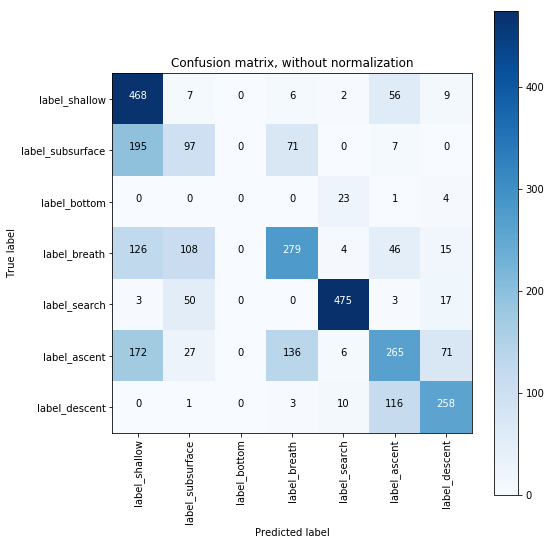

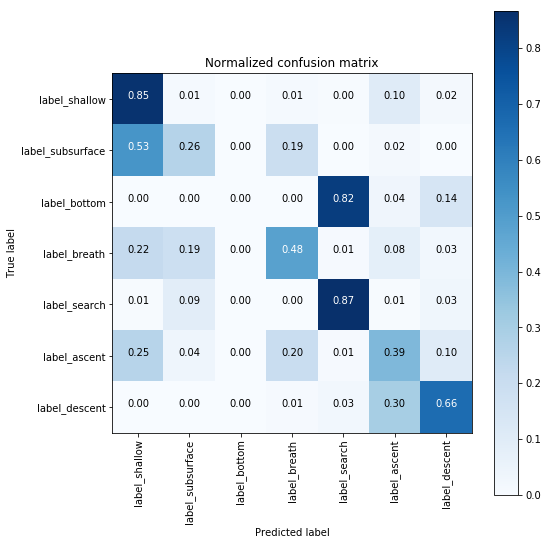

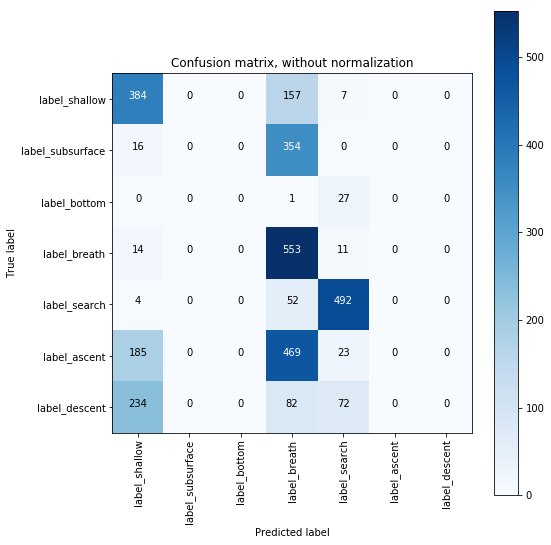

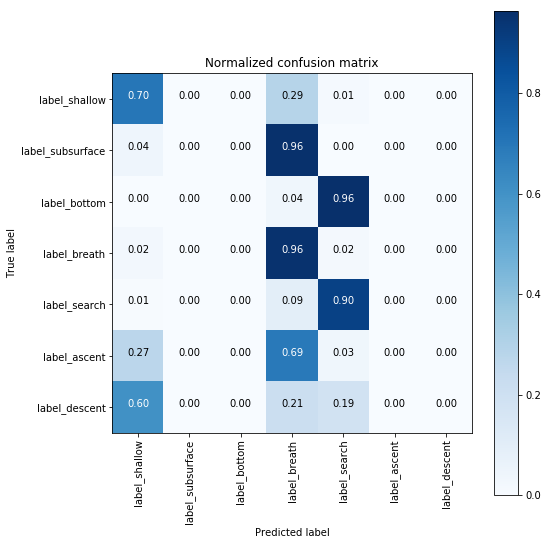

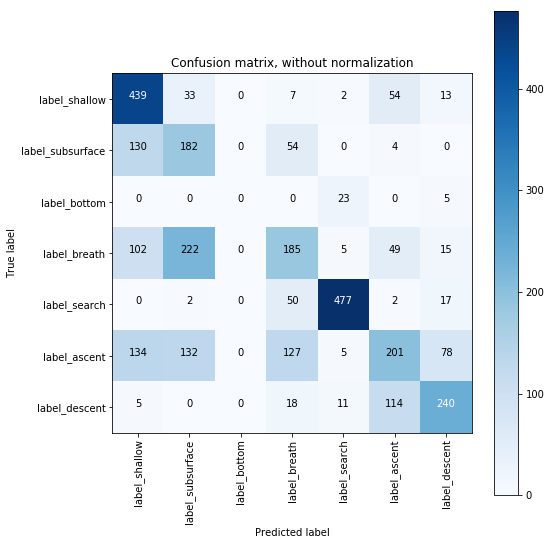

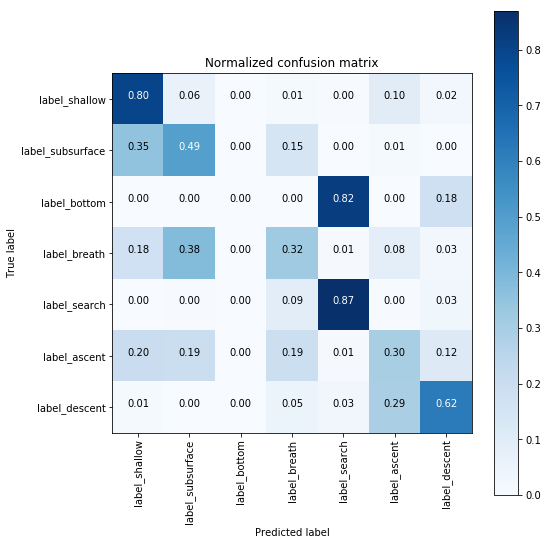

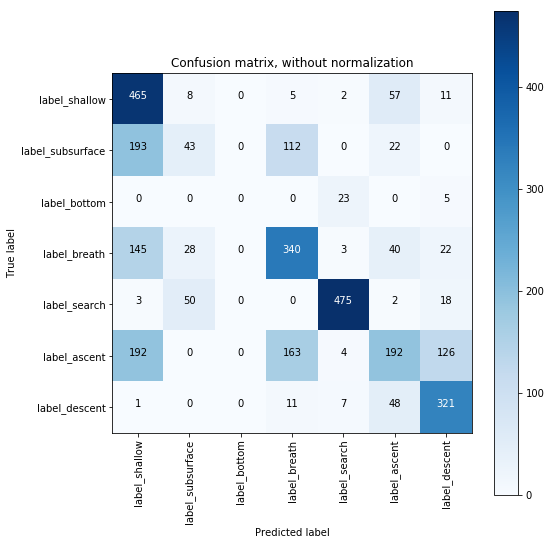

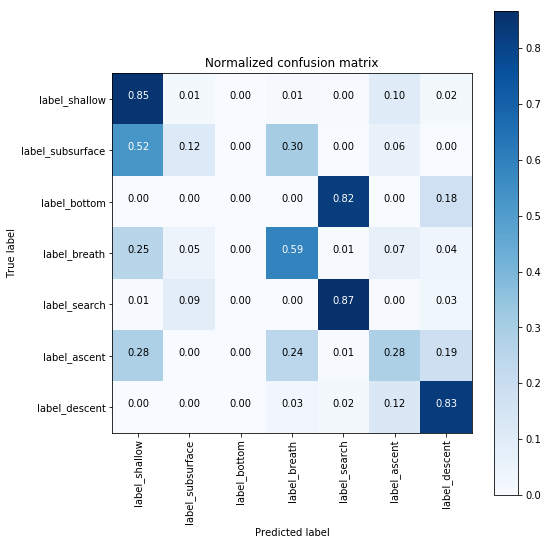

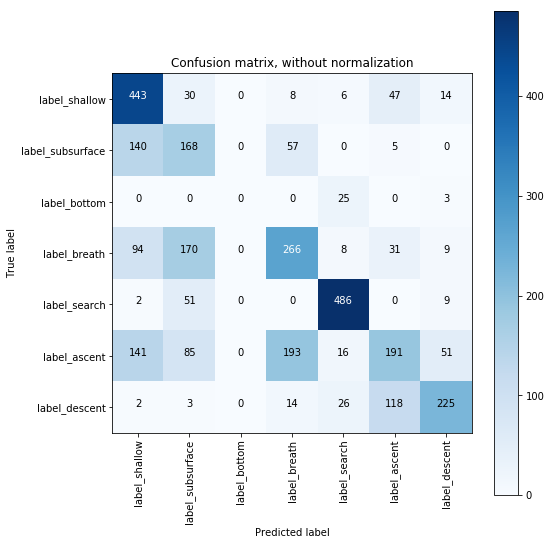

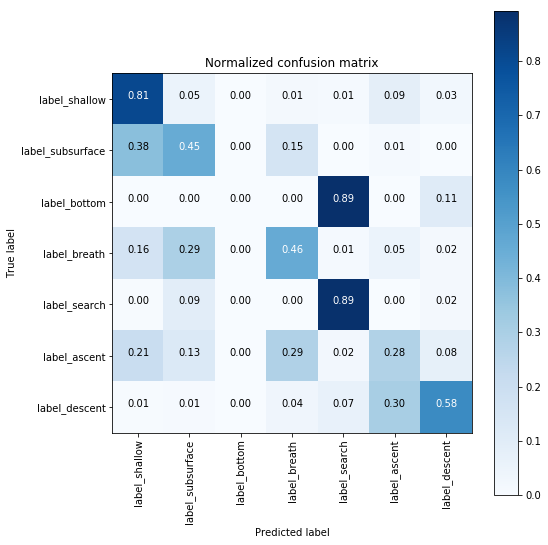

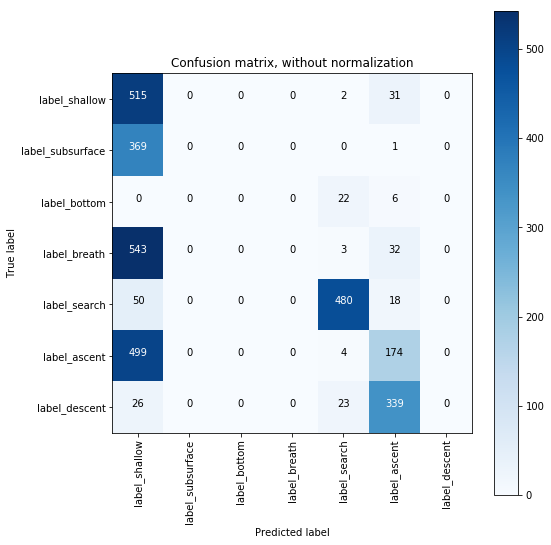

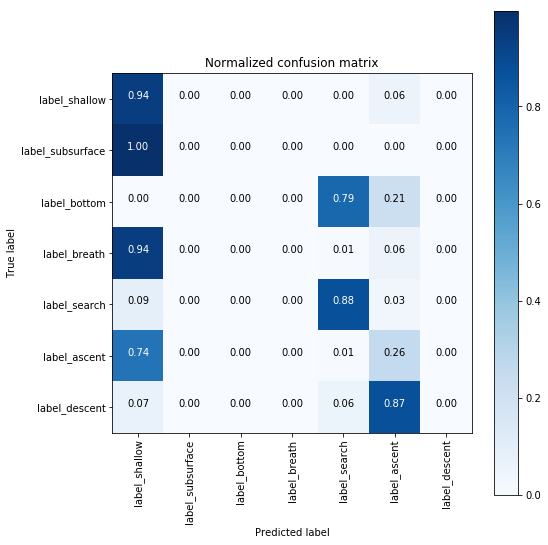

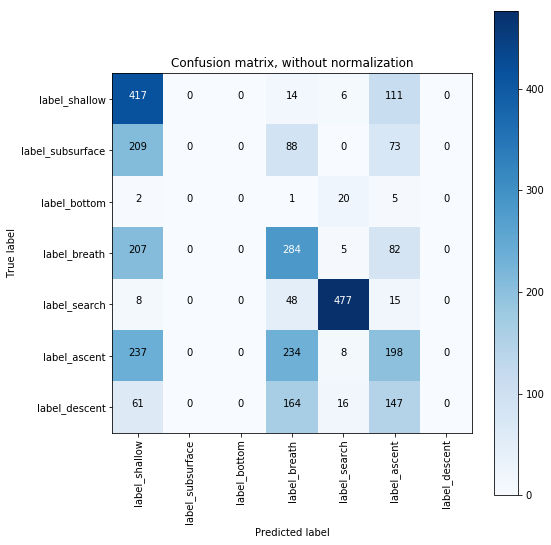

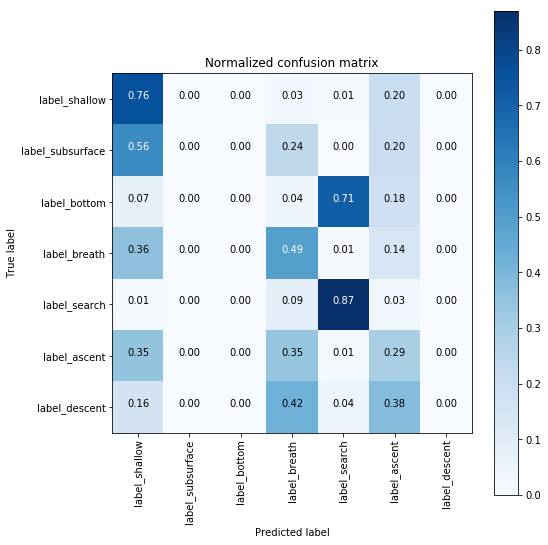

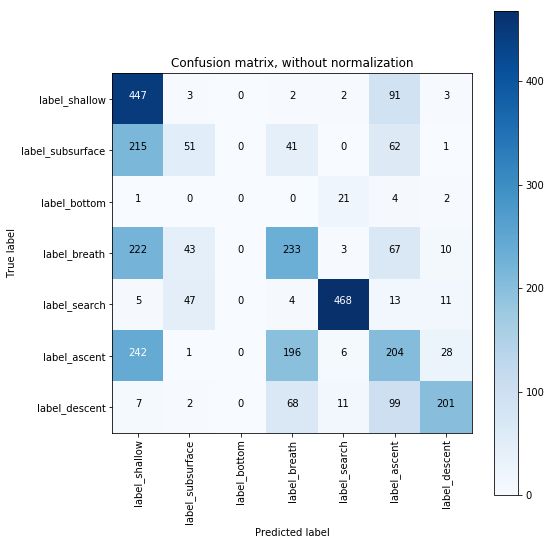

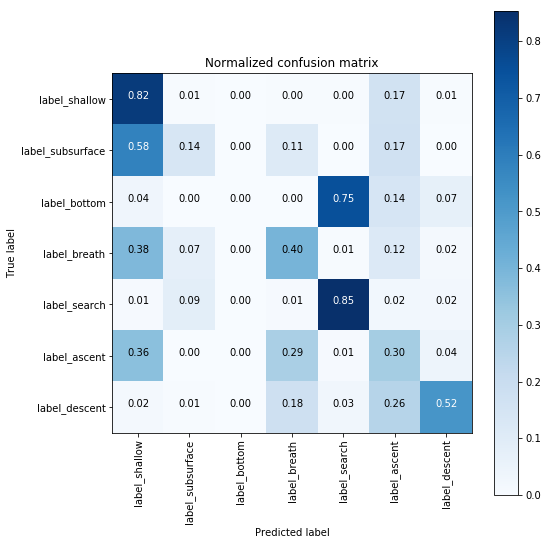

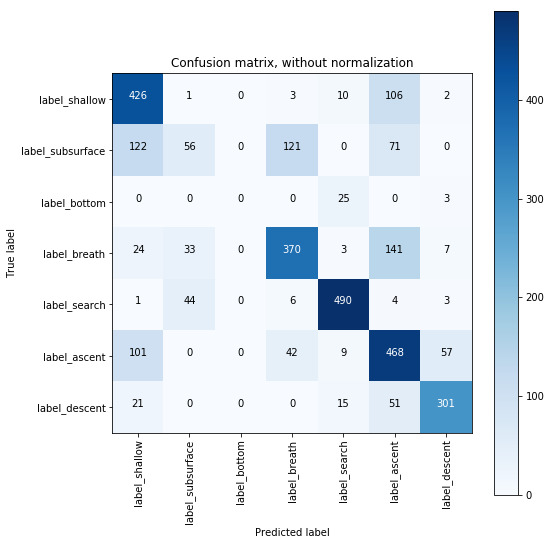

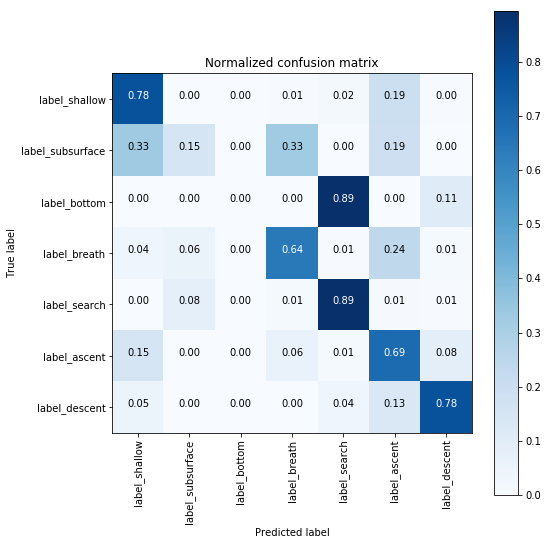

In [11]:
###################
### Run experiments
###################

for row in experiments.values:
    
    # get experiment params from dataframe row
    experiment = dict(zip(experiments.columns, row))
    
    # only run experiment if not already run
    if not os.path.exists(pwd + 'models/' + str(experiment["model_id"]) + '/results.json'):

        # only run experiment if matches this worker id
        if experiment['WORKER'] == WORKER_ID:
            
            print(str(experiment["model_id"]) + "   " + "X"*60)
            logging.info("Begin experiment for model_id={} on GPU:{} ".format(experiment['model_id'], os.environ["CUDA_VISIBLE_DEVICES"]))
            print(experiment)

            architecture = Architecture(model_id = experiment['model_id'], 
                                        architecture = experiment['architecture'], 
                                        sequence_length = experiment['sequence_length'], 
                                        pretrained_model_name = experiment['pretrained_model_name'],
                                        pooling = experiment['pooling'],
                                        sequence_model = experiment['sequence_model'],
                                        sequence_model_layers = experiment['sequence_model_layers'],
                                        layer_1_size = experiment['layer_1_size'],
                                        layer_2_size = experiment['layer_2_size'],
                                        layer_3_size = experiment['layer_3_size'],
                                        dropout = experiment['dropout'],
                                        verbose=True)

            architecture.train_model()
            
            gc.collect()